In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("colleges-sample.csv")
df.head()

,College,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,University of Virginia,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95,No
1,University of South Carolina at Columbia,7693,5815,2328,30,66,12594,3661,8074,3522,495,2941,84,88,16.9,18,8246,63,No
2,Univ. of Wisconsin at OshKosh,4800,2900,1515,14,48,7764,1472,6874,2394,518,1890,73,78,19.2,14,5901,56,No
3,University of Nebraska at Lincoln,6277,6003,3526,33,63,16454,3171,5595,3145,500,2070,86,92,15.1,48,6813,53,No
4,University of Pennsylvania,12394,5232,2464,85,100,9205,531,17020,7270,500,1544,95,96,6.3,38,25765,93,Yes


In [3]:
df.shape

(40, 19)

In [4]:
df.columns

Index(['College', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Private'],
      dtype='str')

In [5]:
# save those info in the numpy version
# numpy improves efficiency
college_name_col = df['College'].to_numpy()
private_or_public_col = df['Private'].to_numpy()

In [6]:
x = df.drop(columns = ['College', 'Private'])
print(x.shape)

(40, 17)


In [7]:
import sys
print(sys.executable)


c:\Users\win\AppData\Local\Python\pythoncore-3.14-64\python.exe


In [8]:
!"c:\Users\win\AppData\Local\Python\pythoncore-3.14-64\python.exe" -m pip install scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!"c:\Users\win\AppData\Local\Python\pythoncore-3.14-64\python.exe" -m pip install notebook nbconvert

  Using cached notebook-7.5.3-py3-none-any.whl.metadata (10 kB)
  Using cached nbconvert-7.17.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyter_server-2.17.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.28.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyterlab-4.5.4-py3-none-any.whl.metadata (16 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached anyio-4.12.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached prometheus_client-0.24.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached send2trash-2.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached terminado-0.18.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [9]:
from sklearn.preprocessing import StandardScaler
# standardize all the numerical features
x_std = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.neighbors import kneighbors_graph
k = 10   # how to choose k?
A = kneighbors_graph(
    x_std,
    n_neighbors=k,
    mode="connectivity",   # only cares about whether there is an edge or not
    include_self=False
)

# A is a sparse adjacency matrix of the k-nearest-neighbor graph
# The matrix A represents a directed, unweighted k-nearest-neighbor similarity graph.
# In order to build the laplacian matrix, we need to 
# use the symmetrization and normalization
# it becomes an undirected similarity graph suitable for Laplacian-based methods
# A[i, j] = 1 if point j is among the k nearest neighbors of point i
# A[i, j] = 0 otherwise

In [11]:
type(A)

scipy.sparse._csr.csr_matrix

In [12]:
sum(A)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 39 stored elements and shape (1, 40)>

In [13]:
# A is a sparse matrix, which is a memory-efficient way to store matrices that are mostly zeros
# To convert it to a dense matrix, we can use the .toarray() method
A_dense = A.toarray()

In [14]:
type(A_dense)

numpy.ndarray

In [15]:
# calculate the symmetric similarity matrix 
# The 0.5 normalize edge weights and avoid double-counting mutual neighbors, leading to a cleaner and more interpretable similarity graph.
# We do not strictly need the 0.5, but we include it to avoid double-counting edges and to keep similarity weights on a consistent scale.

W = 0.5 * (A_dense + A_dense.T)
# (A + A.T) turns “who points to whom” into “who is connected to whom,” producing a clean, undirected similarity graph.

In [16]:
# after we got the similarity graph, we should calculate the L matrix 
# axis = 1 means that we should calculate it by rows
# np.diag put those sum into diagonal matrix 
import numpy as np
D = np.diag(W.sum(axis=1))

In [17]:
L = D - W
L

array([[ 7.5,  0. ,  0. , ..., -1. ,  0. ,  0. ],
       [ 0. , 15.5, -0.5, ...,  0. ,  0. , -1. ],
       [ 0. , -0.5, 11. , ...,  0. ,  0. , -1. ],
       ...,
       [-1. ,  0. ,  0. , ...,  8. ,  0. , -0.5],
       [ 0. ,  0. ,  0. , ...,  0. ,  6. , -0.5],
       [ 0. , -1. , -1. , ..., -0.5, -0.5, 20. ]], shape=(40, 40))

In [18]:
# It is used to calculate the eigvals and eigvecs for the symmetric matrix
# btw the eign will sort the values by ascending order automatically
eigvals, eigvecs = np.linalg.eigh(L)

In [19]:
eigvals

array([7.13557460e-15, 2.25777607e+00, 3.07780251e+00, 4.52204170e+00,
       4.74133228e+00, 5.30565686e+00, 6.10467616e+00, 6.30666068e+00,
       6.43706359e+00, 6.76839933e+00, 6.81943057e+00, 7.37537976e+00,
       7.57328091e+00, 7.75393714e+00, 7.94063696e+00, 8.03839164e+00,
       8.47836759e+00, 8.74765589e+00, 8.97067562e+00, 9.37572786e+00,
       9.54893225e+00, 9.84612647e+00, 1.02174803e+01, 1.03511578e+01,
       1.06012028e+01, 1.13760666e+01, 1.16307489e+01, 1.16951491e+01,
       1.19725941e+01, 1.21837540e+01, 1.28891938e+01, 1.34621658e+01,
       1.39377748e+01, 1.39706575e+01, 1.49764639e+01, 1.65522173e+01,
       1.80309420e+01, 1.91768449e+01, 1.99576003e+01, 2.10280345e+01])

In [20]:
embedded_eigvecs_one = eigvecs[:, 1:2]

In [21]:
embedded_eigvecs_two = eigvecs[:, 2:3]

In [22]:
X_embed = eigvecs[:, 1:3]

In [23]:
import sys
print(sys.executable)

c:\Users\win\AppData\Local\Python\pythoncore-3.14-64\python.exe


In [24]:
!"c:\Users\win\AppData\Local\Python\pythoncore-3.14-64\python.exe" -m pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
df.columns

Index(['College', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Private'],
      dtype='str')

In [42]:
type(df['Private'][0])

str

In [43]:
df['Private']

0      No
1      No
2      No
3      No
4     Yes
5      No
6      No
7      No
8      No
9      No
10    Yes
11     No
12     No
13    Yes
14    Yes
15    Yes
16     No
17     No
18     No
19     No
20    Yes
21     No
22     No
23     No
24     No
25     No
26    Yes
27     No
28     No
29     No
30     No
31     No
32     No
33    Yes
34     No
35     No
36     No
37    Yes
38    Yes
39     No
Name: Private, dtype: str

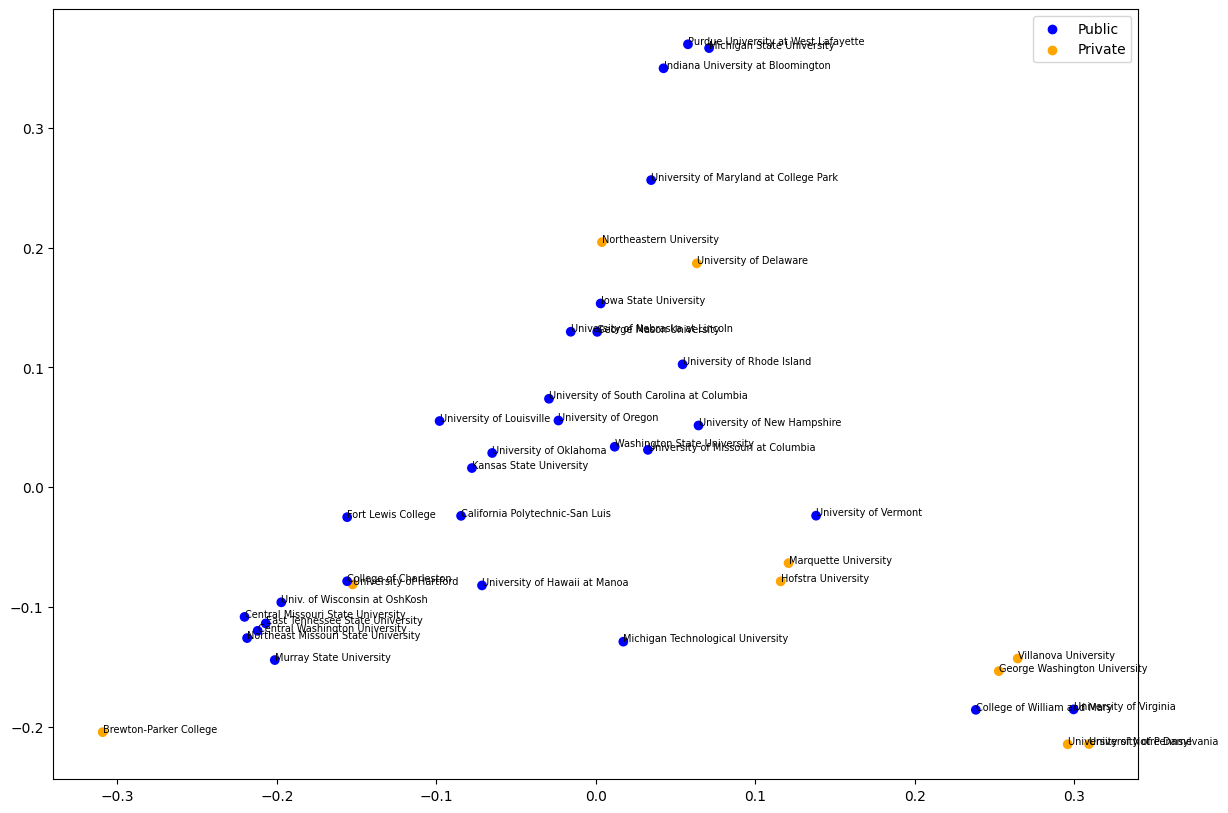

In [55]:
import matplotlib.pyplot as plt

# choose the picture size
plt.figure(figsize=(14, 10))  

# the first column of X_embed is the x-axis, and the second column is the y-axis
x, y = X_embed[:, 0], X_embed[:, 1]

# private -> orange, public -> blue
# astype convert the "Private" column to string type, str.lower() convert it to lowercase
# if the element in the "Private" column is "Yes", then it will be colored orange, otherwise it will be colored blue
c = np.where(df["Private"].astype(str).str.lower().isin(["yes"]), "orange", "blue")

# scatter plot with color coding based on the "Private" column
# x, y → WHERE the point is
# c → WHAT the point looks like
# PS: the length of x, y, c should be the same, which is the number of rows in the dataframe
plt.scatter(x, y, c=c)

# add college names as labels for each point
# is the index of the row, df.iloc[i, "College"] is the college name in the i-th row
# fontsize is the size of the label
# iloc is used to access the data by the index of the row and the column name
for i in range(len(df)):
    plt.text(x[i], y[i], df.loc[i, "College"], fontsize=7)

# add title and axis labels
plt.scatter([], [], c="blue", label="Public")
plt.scatter([], [], c="orange", label="Private")
plt.legend()

plt.show()

In [ ]:
# update